# Goal: Predicting type of an Iris flower from its petal, and sepal length and width.    

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier 
import io
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import random

# Extration and Storage 

In [ ]:
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
type(uploaded) 

dict

In [ ]:
print(uploaded)

{'iris.csv': b'slcm,swcm,plcm,pwcm,Iris\r\n5.1,3.5,1.4,0.2,setosa\r\n5.2,3,1.4,0.2,setosa\r\n5.3,3.2,1.3,0.2,setosa\r\n5.4,3.1,1.5,0.2,setosa\r\n5.5,3.6,1.4,0.2,setosa\r\n5.6,3.9,1.7,0.4,setosa\r\n5.7,3.4,1.4,0.3,setosa\r\n5.8,3.4,1.5,0.2,setosa\r\n5.9,2.9,1.4,0.2,setosa\r\n5.1,3.1,1.5,0.1,setosa\r\n5.11,3.7,1.5,0.2,setosa\r\n5.12,3.4,1.6,0.2,setosa\r\n5.13,3,1.4,0.1,setosa\r\n5.14,3,1.1,0.1,setosa\r\n5.15,4,1.2,0.2,setosa\r\n5.16,4.4,1.5,0.4,setosa\r\n5.17,3.9,1.3,0.4,setosa\r\n5.18,3.5,1.4,0.3,setosa\r\n5.19,3.8,1.7,0.3,setosa\r\n5.2,3.8,1.5,0.3,setosa\r\n5.21,3.4,1.7,0.2,setosa\r\n5.22,3.7,1.5,0.4,setosa\r\n5.23,3.6,1,0.2,setosa\r\n5.24,3.3,1.7,0.5,setosa\r\n5.25,3.4,1.9,0.2,setosa\r\n5.26,3,1.6,0.2,setosa\r\n5.27,3.4,1.6,0.4,setosa\r\n5.28,3.5,1.5,0.2,setosa\r\n5.29,3.4,1.4,0.2,setosa\r\n5.3,3.2,1.6,0.2,setosa\r\n5.31,3.1,1.6,0.2,setosa\r\n5.32,3.4,1.5,0.4,setosa\r\n5.33,4.1,1.5,0.1,setosa\r\n5.34,4.2,1.4,0.2,setosa\r\n5.35,3.1,1.5,0.1,setosa\r\n5.36,3.2,1.2,0.2,setosa\r\n5.37,3.5,

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df

,slcm,swcm,plcm,pwcm,Iris
0,5.100,3.5,1.4,0.2,setosa
1,5.200,3.0,1.4,0.2,setosa
2,5.300,3.2,1.3,0.2,setosa
3,5.400,3.1,1.5,0.2,setosa
4,5.500,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,5.146,3.0,5.2,2.3,virginica
146,5.147,2.5,5.0,1.9,virginica
147,5.148,3.0,5.2,2.0,virginica
148,5.149,3.4,5.4,2.3,virginica


In [ ]:
df["Iris"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Iris, dtype: int64

setosa        50
versicolor    50
virginica     50
Name: Iris, dtype: int64

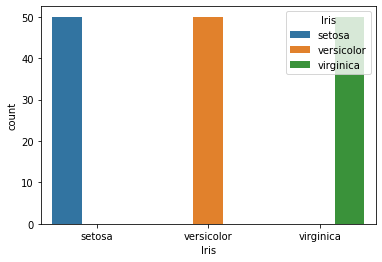

In [ ]:
sns.countplot(x ="Iris", hue ="Iris", data = df)
df.loc[:,"Iris"].value_counts()

# Exploratory Data Analysis (EDA)
# &
# Simple Visualisation



In [ ]:
df.describe()

,slcm,swcm,plcm,pwcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.399500,3.054000,3.758667,1.198667
std,0.289925,0.433594,1.764420,0.763161
min,5.100000,2.000000,1.000000,0.100000
25%,5.132250,2.800000,1.600000,0.300000
50%,5.305000,3.000000,4.350000,1.300000
75%,5.647500,3.300000,5.100000,1.800000
max,5.990000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum() 

slcm    0
swcm    0
plcm    0
pwcm    0
Iris    0
dtype: int64

In [ ]:
df['slcm'].describe()

count    150.000000
mean       5.399500
std        0.289925
min        5.100000
25%        5.132250
50%        5.305000
75%        5.647500
max        5.990000
Name: slcm, dtype: float64

In [ ]:
slcm_max=df['slcm'] == 5.99
slcm_max.value_counts()

False    149
True       1
Name: slcm, dtype: int64

In [ ]:
df['plcm'].describe

<bound method NDFrame.describe of 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: plcm, Length: 150, dtype: float64>

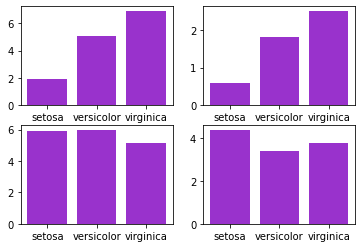

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0, 0].bar(df['Iris'], df['plcm'], color = 'darkorchid')
ax[0, 1].bar(df['Iris'], df['pwcm'], color = 'darkorchid')
ax[1, 0].bar(df['Iris'], df['slcm'], color = 'darkorchid')
ax[1, 1].bar(df['Iris'], df['swcm'], color = 'darkorchid')
plt.show()

In [ ]:
df['plcm'].loc[(df['Iris'] == 'setosa')].min()

1.0

In [ ]:
df['plcm'].loc[(df['Iris'] == 'versicolor')].min()

3.0

In [ ]:
df['plcm'].loc[(df['Iris'] == 'virginica')].min()

4.5

In [ ]:
df['plcm'].loc[(df['Iris'] == 'setosa')].max()

1.9

In [ ]:
df['plcm'].loc[(df['Iris'] == 'versicolor')].max()

5.1

In [ ]:
df['plcm'].loc[(df['Iris'] == 'virginica')].max()

6.9

In [ ]:
df.groupby('Iris').agg({'pwcm':['min','max','mean'], 'plcm':['min','max','mean']})

pwcm             plcm            
            min  max   mean  min  max   mean
Iris                                        
setosa      0.1  0.6  0.244  1.0  1.9  1.464
versicolor  1.0  1.8  1.326  3.0  5.1  4.260
virginica   1.4  2.5  2.026  4.5  6.9  5.552

In [ ]:
df['Iris'].loc[(df['plcm'] <= 2.0) & (df['pwcm'] <=1.0)].value_counts()

setosa    50
Name: Iris, dtype: int64

In [ ]:
df['Iris'].loc[((df['plcm'] <= 5.0) & (df['plcm'] >= 2.0 )) & ((df['pwcm'] < 2.0) & (df['pwcm'] > 1.0 ))].value_counts()

versicolor    42
virginica      7
Name: Iris, dtype: int64

In [ ]:
df['Iris'].loc[((df['plcm'] > 4.8)) & ((df['pwcm'] > 1.3 ))].value_counts()

virginica     47
versicolor     4
Name: Iris, dtype: int64

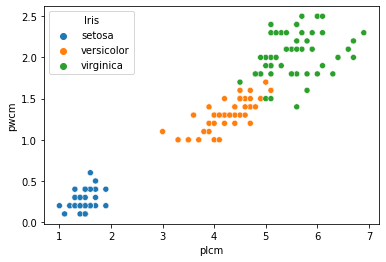

In [ ]:
sns.scatterplot(x='plcm', y='pwcm', data=df, hue='Iris')

### Petal length and width:  Mean, Std Dev, Variance, 90th Percentile, Quantile, Meadian, and Median Absolute Deviation

Because we are interested in Petal length and width

In [ ]:
iris_setosa = df[df['Iris'] == 'setosa']['plcm']
iris_versicolor = df[df['Iris'] == 'versicolor']['plcm']
iris_virginica = df[df['Iris'] == 'virginica']['plcm']

print('Mean')
print('*****************************')
print('  Iris Setosa\t  ', np.mean(iris_setosa))
print('  Iris Versicolor ', np.mean(iris_versicolor))
print('  Iris Virginica  ',  np.mean(iris_virginica))
print('*****************************',end = '\n\n\n')

print('Std Deviation')
print('*****************************')
print('Iris Setosa\t', np.std(iris_setosa))
print('Iris Versicolor ', np.std(iris_versicolor))
print('Iris Virginica  ',  np.std(iris_virginica))
print('*****************************')

print('Median')
print('*****************************')
print('  Iris Setosa\t  ', np.median(iris_setosa))
print('  Iris Versicolor ', np.median(iris_versicolor))
print('  Iris Virginica  ',  np.median(iris_virginica))
print('*****************************',end = '\n\n\n')

print('Quantile')
print('*****************************')
print('  Iris Setosa\t  ', np.percentile(iris_setosa, np.arange(0,100, 25)))
print('  Iris Versicolor ', np.percentile(iris_versicolor, np.arange(0,100, 25)))
print('  Iris Virginica  ',  np.percentile(iris_virginica, np.arange(0,100, 25)))
print('*****************************',end = '\n\n\n')


print('90th Percentile')
print('*****************************')
print('  Iris Setosa\t  ', np.percentile(iris_setosa, 90))
print('  Iris Versicolor ', np.percentile(iris_versicolor, 90))
print('  Iris Virginica  ',  np.percentile(iris_virginica, 90))
print('*****************************',end = '\n\n\n')

print('Median Absolute Deviation')
print('*****************************')
print('  Iris Setosa\t  ', np.median(np.absolute(iris_setosa - np.median(iris_setosa))))
print('  Iris Versicolor ',np.median(np.absolute(iris_versicolor - np.median(iris_versicolor))))
print('  Iris Virginica  ',np.median(np.absolute(iris_virginica - np.median(iris_virginica))))
print('*****************************')


Mean
*****************************
  Iris Setosa	   1.464
  Iris Versicolor  4.26
  Iris Virginica   5.552
*****************************


Std Deviation
*****************************
Iris Setosa	 0.17176728442867115
Iris Versicolor  0.4651881339845204
Iris Virginica   0.5463478745268441
*****************************
Median
*****************************
  Iris Setosa	   1.5
  Iris Versicolor  4.35
  Iris Virginica   5.55
*****************************


Quantile
*****************************
  Iris Setosa	   [1.    1.4   1.5   1.575]
  Iris Versicolor  [3.   4.   4.35 4.6 ]
  Iris Virginica   [4.5   5.1   5.55  5.875]
*****************************


90th Percentile
*****************************
  Iris Setosa	   1.7
  Iris Versicolor  4.8
  Iris Virginica   6.31
*****************************


Median Absolute Deviation
*****************************
  Iris Setosa	   0.10000000000000009
  Iris Versicolor  0.34999999999999964
  Iris Virginica   0.4500000000000002
****************************

In [ ]:
iris_setosa_1 = df[df['Iris'] == 'setosa']['pwcm']
iris_versicolor_1 = df[df['Iris'] == 'versicolor']['pwcm']
iris_virginica_1 = df[df['Iris'] == 'virginica']['pwcm']

print('Mean')
print('*****************************')
print('  Iris Setosa\t  ', np.mean(iris_setosa_1))
print('  Iris Versicolor ', np.mean(iris_versicolor_1))
print('  Iris Virginica  ',  np.mean(iris_virginica_1))
print('*****************************',end = '\n\n\n')

print('Std Deviation')
print('*****************************')
print('Iris Setosa\t', np.std(iris_setosa_1))
print('Iris Versicolor ', np.std(iris_versicolor_1))
print('Iris Virginica  ',  np.std(iris_virginica_1))
print('*****************************')

print('Median')
print('*****************************')
print('  Iris Setosa\t  ', np.median(iris_setosa_1))
print('  Iris Versicolor ', np.median(iris_versicolor_1))
print('  Iris Virginica  ',  np.median(iris_virginica_1))
print('*****************************',end = '\n\n\n')

print('Quantile')
print('*****************************')
print('  Iris Setosa\t  ', np.percentile(iris_setosa_1, np.arange(0,100, 25)))
print('  Iris Versicolor ', np.percentile(iris_versicolor_1, np.arange(0,100, 25)))
print('  Iris Virginica  ',  np.percentile(iris_virginica_1, np.arange(0,100, 25)))
print('*****************************',end = '\n\n\n')


print('90th Percentile')
print('*****************************')
print('  Iris Setosa\t  ', np.percentile(iris_setosa_1, 90))
print('  Iris Versicolor ', np.percentile(iris_versicolor_1, 90))
print('  Iris Virginica  ',  np.percentile(iris_virginica_1, 90))
print('*****************************',end = '\n\n\n')

print('Median Absolute Deviation')
print('*****************************')
print('  Iris Setosa\t  ', np.median(np.absolute(iris_setosa_1 - np.median(iris_setosa_1))))
print('  Iris Versicolor ',np.median(np.absolute(iris_versicolor_1 - np.median(iris_versicolor_1))))
print('  Iris Virginica  ',np.median(np.absolute(iris_virginica_1 - np.median(iris_virginica_1))))
print('*****************************')

Mean
*****************************
  Iris Setosa	   0.2439999999999999
  Iris Versicolor  1.3259999999999998
  Iris Virginica   2.026
*****************************


Std Deviation
*****************************
Iris Setosa	 0.10613199329137278
Iris Versicolor  0.19576516544063702
Iris Virginica   0.2718896835115301
*****************************
Median
*****************************
  Iris Setosa	   0.2
  Iris Versicolor  1.3
  Iris Virginica   2.0
*****************************


Quantile
*****************************
  Iris Setosa	   [0.1 0.2 0.2 0.3]
  Iris Versicolor  [1.  1.2 1.3 1.5]
  Iris Virginica   [1.4 1.8 2.  2.3]
*****************************


90th Percentile
*****************************
  Iris Setosa	   0.4
  Iris Versicolor  1.5100000000000002
  Iris Virginica   2.4
*****************************


Median Absolute Deviation
*****************************
  Iris Setosa	   0.0
  Iris Versicolor  0.15000000000000002
  Iris Virginica   0.19999999999999996
***********************

 Every measurement : Mean, Std Dev, Variance, 90th Percentile, Quantile, Meadian, and Median Absolute Deviation 

Just in case 


In [ ]:
print(df.groupby('Iris').size(), end = '\n\n\n')
print('Mean')
print('*****************************')
print(df.groupby('Iris').mean(), end = '\n\n\n')
print('*****************************',end = '\n\n\n')
print('Std Deviation')
print('*****************************')
print(df.groupby('Iris').std())
print('*****************************')


Iris
setosa        50
versicolor    50
virginica     50
dtype: int64


Mean
*****************************
              slcm   swcm   plcm   pwcm
Iris                                   
setosa      5.3360  3.418  1.464  0.244
versicolor  5.7370  2.770  4.260  1.326
virginica   5.1255  2.974  5.552  2.026


*****************************


Std Deviation
*****************************
                slcm      swcm      plcm      pwcm
Iris                                              
setosa      0.173158  0.381024  0.173511  0.107210
versicolor  0.168671  0.313798  0.469911  0.197753
virginica   0.014577  0.322497  0.551895  0.274650
*****************************


In [ ]:
print('Median')
print('*****************************')
print(df.drop(['PetalSize'], axis = 1).groupby('Iris').median())
print('*****************************',end = '\n\n\n')
print('90th Percentile')
print('*****************************')
print(df.drop(['PetalSize'], axis = 1).groupby('Iris').quantile(q =0.9))
print('*****************************',end = '\n\n\n')
print('Quantile')
print('*****************************')
print(df.drop(['PetalSize'], axis = 1).groupby('Iris').quantile(q = np.arange(0,1, 0.25)))
print('*****************************',end = '\n\n\n')
print('Median Absolute Deviation')
print('*****************************')
print(df.drop(['PetalSize'], axis = 1).groupby('Iris').mad(axis = 0))
print('*****************************',end = '\n\n\n')

# Mean, Std Dev, Variance can be corrupted by outliers significantly.
# Hence, we will see Median, quantile and 90th Percentile.
# 90th percentile can help us dig a little deeper in the dataset.
# Median Absolute Deviation is similar to Std Deviation but it is not impacted by outliers

Median
*****************************
              slcm  swcm  plcm  pwcm
Iris                                
setosa      5.3150   3.4  1.50   0.2
versicolor  5.7450   2.8  4.35   1.3
virginica   5.1255   3.0  5.55   2.0
*****************************


90th Percentile
*****************************
              slcm  swcm  plcm  pwcm
Iris                                
setosa      5.5000  3.90  1.70  0.40
versicolor  5.9410  3.11  4.80  1.51
virginica   5.1451  3.31  6.31  2.40
*****************************


Quantile
*****************************
                    slcm   swcm   plcm  pwcm
Iris                                        
setosa     0.00  5.10000  2.300  1.000   0.1
           0.25  5.20250  3.125  1.400   0.2
           0.50  5.31500  3.400  1.500   0.2
           0.75  5.42750  3.675  1.575   0.3
versicolor 0.00  5.10000  2.000  3.000   1.0
           0.25  5.62250  2.525  4.000   1.2
           0.50  5.74500  2.800  4.350   1.3
           0.75  5.86750  3.000  4.600 

In [ ]:
bins = [0, 2, 4, np.inf]
labels = ['Small', 'Medium', 'Big']

df['PetalSize'] = pd.cut(df.plcm, bins=bins, labels=labels)
df.PetalSize.value_counts()

Big       84
Small     50
Medium    16
Name: PetalSize, dtype: int64

In [ ]:
df.Iris.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
print(df.head())


   slcm  swcm  plcm  pwcm    Iris PetalSize
0   5.1   3.5   1.4   0.2  setosa     Small
1   5.2   3.0   1.4   0.2  setosa     Small
2   5.3   3.2   1.3   0.2  setosa     Small
3   5.4   3.1   1.5   0.2  setosa     Small
4   5.5   3.6   1.4   0.2  setosa     Small
(150, 6)


### Pair Plots

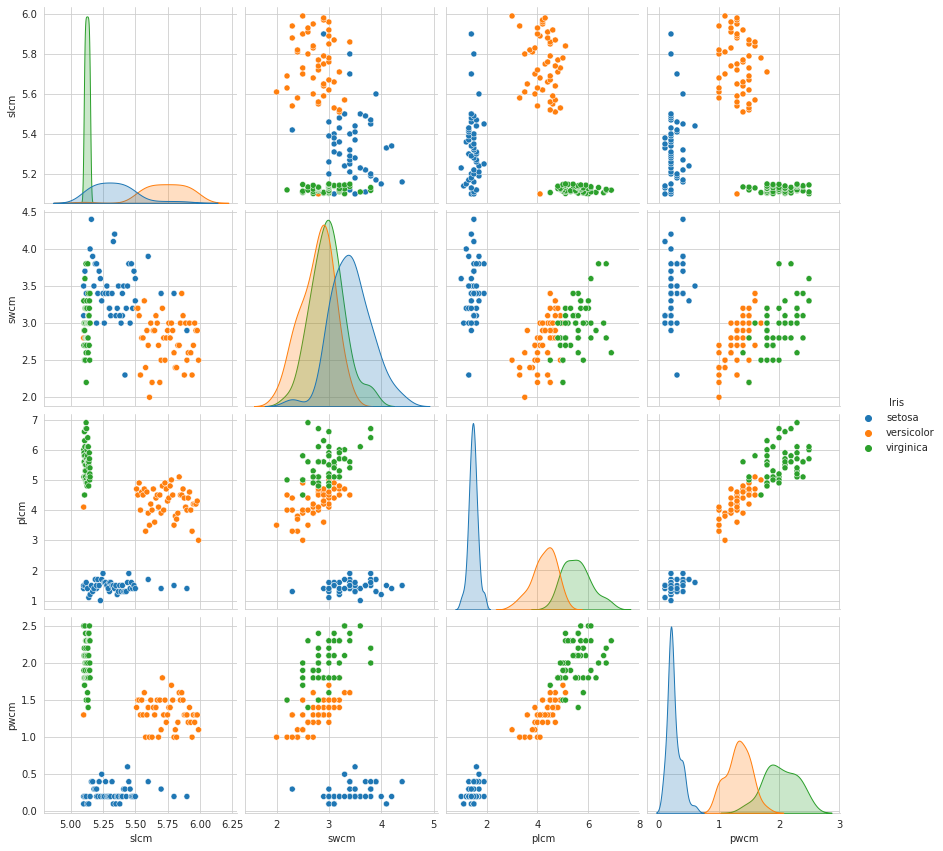

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Iris', height = 3)
plt.show() #they look pretty, just for fun! 

### CDF or Cumulative Density Function

check what percentage of Versicolor flower have a petal length of less than 1.5 unit, for that we have to plot a CDF

Probability Density Function- [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]  length =  10
Cumulative Density Function - [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]  length =  10
Bin edges		 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]  length =  11



Text(0, 0.5, 'Probability')

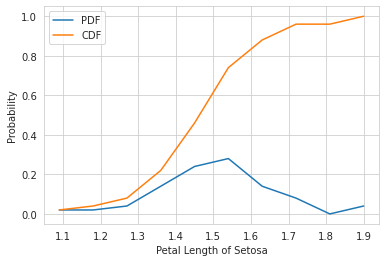

In [ ]:
iris_setosa = df[df['Iris'] == 'setosa']['plcm']
counts, bins = np.histogram(iris_setosa, bins = 10, density = False)

pdf = counts / sum(counts)
print('Probability Density Function-', pdf, ' length = ',len(pdf))


cdf = np.cumsum(pdf)
print('Cumulative Density Function -', cdf, ' length = ',len(cdf))

print('Bin edges\t\t', bins, ' length = ',len(bins))
print()

plt.plot(bins[1:], pdf, label = 'PDF')
plt.plot(bins[1:], cdf, label = 'CDF')
plt.legend()
plt.xlabel('Petal Length of Setosa')
plt.ylabel('Probability')


# ML MODEL

In [ ]:
y = df['Iris']
X = df.drop(['Iris', 'PetalSize'], axis = 1).values
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Iris, Length: 150, dtype: object

In [ ]:
X

array([[5.1  , 3.5  , 1.4  , 0.2  ],
       [5.2  , 3.   , 1.4  , 0.2  ],
       [5.3  , 3.2  , 1.3  , 0.2  ],
       [5.4  , 3.1  , 1.5  , 0.2  ],
       [5.5  , 3.6  , 1.4  , 0.2  ],
       [5.6  , 3.9  , 1.7  , 0.4  ],
       [5.7  , 3.4  , 1.4  , 0.3  ],
       [5.8  , 3.4  , 1.5  , 0.2  ],
       [5.9  , 2.9  , 1.4  , 0.2  ],
       [5.1  , 3.1  , 1.5  , 0.1  ],
       [5.11 , 3.7  , 1.5  , 0.2  ],
       [5.12 , 3.4  , 1.6  , 0.2  ],
       [5.13 , 3.   , 1.4  , 0.1  ],
       [5.14 , 3.   , 1.1  , 0.1  ],
       [5.15 , 4.   , 1.2  , 0.2  ],
       [5.16 , 4.4  , 1.5  , 0.4  ],
       [5.17 , 3.9  , 1.3  , 0.4  ],
       [5.18 , 3.5  , 1.4  , 0.3  ],
       [5.19 , 3.8  , 1.7  , 0.3  ],
       [5.2  , 3.8  , 1.5  , 0.3  ],
       [5.21 , 3.4  , 1.7  , 0.2  ],
       [5.22 , 3.7  , 1.5  , 0.4  ],
       [5.23 , 3.6  , 1.   , 0.2  ],
       [5.24 , 3.3  , 1.7  , 0.5  ],
       [5.25 , 3.4  , 1.9  , 0.2  ],
       [5.26 , 3.   , 1.6  , 0.2  ],
       [5.27 , 3.4  , 1.6  , 0.4  ],
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Create a k-NN classifier with 4 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 4)

cv_scores = cross_val_score(knn,X ,y ,cv = 5)

print(cv_scores)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
score = knn.score(X_test, y_test) 

# Print the accuracy
print(score)

(120, 4)
(120,)
(30, 4)
(30,)
[1. 1. 1. 1. 1.]
1.0


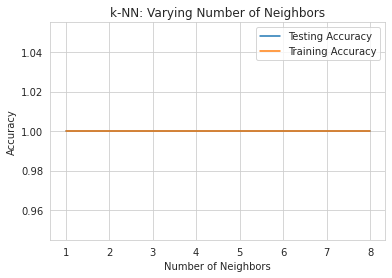

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3],[4.7, 3.2, 1.3, 0.2], [4.4,2.9,1.0,0.3]])


prediction = knn.predict(X_new)
print(prediction)

['versicolor' 'versicolor' 'setosa' 'setosa']


In [ ]:
y_svm = df['Iris']
X_svm = df.drop(['swcm','slcm','Iris','PetalSize'], axis = 1).values
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_svm, y_svm, test_size = 0.2, random_state=42, stratify=y)

print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

classifier = SVC()
classifier.fit(X_train_1, y_train_1)

y_pred = classifier.predict(X_test_1)
scores_svm = classifier.score(X_test_1, y_test_1)
print(scores_svm)

(120, 2)
(120,)
(30, 2)
(30,)
0.9666666666666667


In [ ]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


## ML (EXTRA)

In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df2

,slcm,swcm,plcm,pwcm,Iris
0,5.100,3.5,1.4,0.2,setosa
1,5.200,3.0,1.4,0.2,setosa
2,5.300,3.2,1.3,0.2,setosa
3,5.400,3.1,1.5,0.2,setosa
4,5.500,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,5.146,3.0,5.2,2.3,virginica
146,5.147,2.5,5.0,1.9,virginica
147,5.148,3.0,5.2,2.0,virginica
148,5.149,3.4,5.4,2.3,virginica


setosa        50
versicolor    50
virginica     50
Name: Iris, dtype: int64

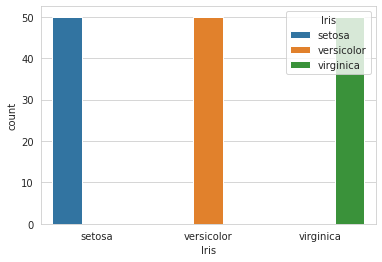

In [ ]:
sns.countplot(x ="Iris", hue ="Iris", data = df2)
df2.loc[:,"Iris"].value_counts()

In [ ]:
#Finding the optimum number of clusters for k-means classification
wcss = []
data_new = df2.drop(["Iris"], axis=1)
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

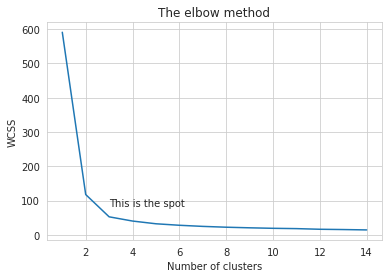

In [ ]:
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.annotate('This is the spot', xy=(3, 85))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_new)
data_new["labels"] = y_kmeans
data_new.tail()

,slcm,swcm,plcm,pwcm,labels
145,5.146,3.0,5.2,2.3,2
146,5.147,2.5,5.0,1.9,2
147,5.148,3.0,5.2,2.0,2
148,5.149,3.4,5.4,2.3,2
149,5.150,3.0,5.1,1.8,2


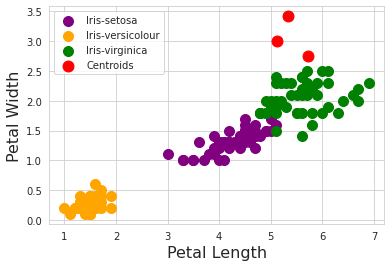

In [ ]:
#Visualising the clusters
plt.scatter(data_new.plcm[data_new.labels == 0], data_new.pwcm[data_new.labels == 0], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data_new.plcm[data_new.labels == 1], data_new.pwcm[data_new.labels == 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data_new.plcm[data_new.labels == 2], data_new.pwcm[data_new.labels == 2], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 120, c = 'red', label = 'Centroids')
plt.legend()

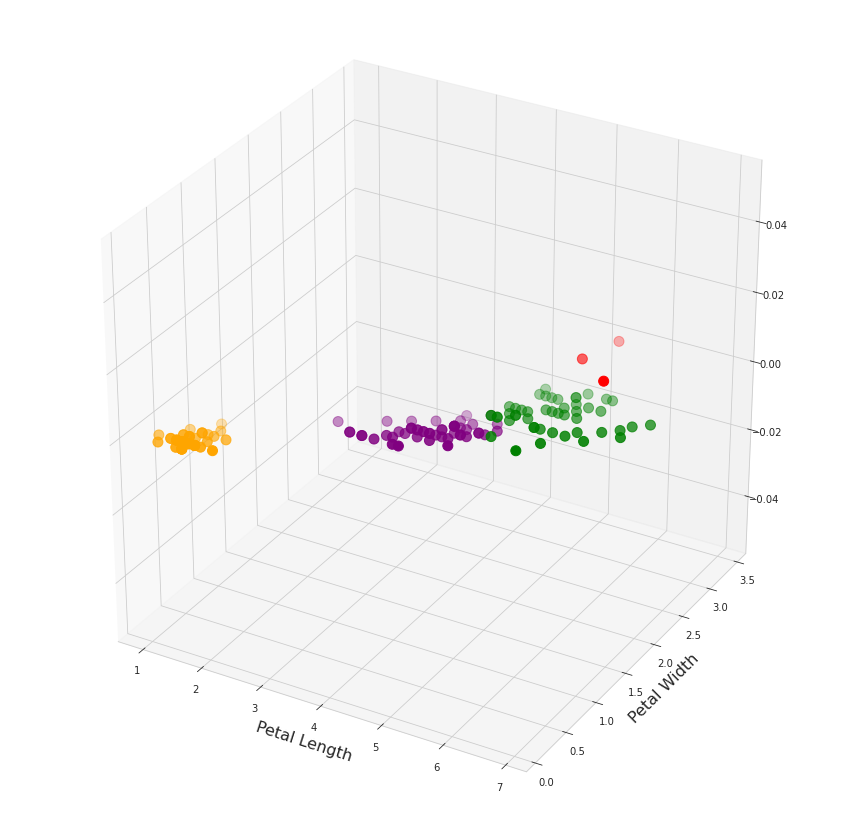

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(data_new.plcm[data_new.labels == 0], data_new.pwcm[data_new.labels == 0], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data_new.plcm[data_new.labels == 1], data_new.pwcm[data_new.labels == 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data_new.plcm[data_new.labels == 2], data_new.pwcm[data_new.labels == 2], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()